In this notebook, I would like to test how the number of steps used to generate the global time series affects the gloabl spin (rotation vector) and deformation (glide vector) of the celestial reference frame.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join

from tool_func import vsh_fit_for_pm



Load data.

ICRF3 defining source list.

In [2]:
icrf3_def = Table.read("../data/icrf3sx-def-sou.txt", format="ascii")

Table of apparent proper motion from different steps.

In [3]:
def read_apm_table(file_name):

    apm_table = Table.read(file_name, format="ascii.csv")

    mask = apm_table["num_cln"] >= 5
    apm_table = apm_table[mask]

    # convert mas/yr into muas/yr
    apm_table["pmra"] = apm_table["pmra"] * 1e3
    apm_table["pmra_err"] = apm_table["pmra_err"] * 1e3
    apm_table["pmdec"] = apm_table["pmdec"] * 1e3
    apm_table["pmdec_err"] = apm_table["pmdec_err"] * 1e3



    return apm_table

In [4]:
all_apm4 = read_apm_table("../data/ts_nju_pm_fit_3sigma.dat")
all_apm8 = read_apm_table("../data/ts_nju_pm_fit_3sigma-8step.dat")
all_apm10 = read_apm_table("../data/ts_nju_pm_fit_3sigma-10step.dat")
all_apm20 = read_apm_table("../data/ts_nju_pm_fit_3sigma-20step.dat")

A function to

In [5]:
def spin_fit(apm_table, icrf3_def):
    
    pmt1, sig1, output1 = vsh_fit_for_pm(apm_table)
    
    # Extract the data for ICRF3 defining sources.
    def_apm_table = join(icrf3_def, apm_table, keys="iers_name")
    pmt2, sig2, output2 = vsh_fit_for_pm(def_apm_table)
    
    return pmt1, sig1, output1, pmt2, sig2, output2

In [6]:
pmt1_4, sig1_4, output1_4, pmt2_4, sig2_4, output2_4 = spin_fit(
    all_apm4, icrf3_def)
pmt1_8, sig1_8, output1_8, pmt2_8, sig2_8, output2_8 = spin_fit(
    all_apm8, icrf3_def)
pmt1_10, sig1_10, output1_10, pmt2_10, sig2_10, output2_10 = spin_fit(
    all_apm10, icrf3_def)
pmt1_20, sig1_20, output1_20, pmt2_20, sig2_20, output2_20 = spin_fit(
    all_apm20, icrf3_def)

In [7]:
r1_all = np.array([pmt1_4[0], pmt1_8[0], pmt1_10[0], pmt1_20[0]])
r2_all = np.array([pmt1_4[1], pmt1_8[1], pmt1_10[1], pmt1_20[1]])
r3_all = np.array([pmt1_4[2], pmt1_8[2], pmt1_10[2], pmt1_20[2]])

g1_all = np.array([pmt1_4[4], pmt1_8[4], pmt1_10[4], pmt1_20[4]])
g2_all = np.array([pmt1_4[5], pmt1_8[5], pmt1_10[5], pmt1_20[5]])
g3_all = np.array([pmt1_4[6], pmt1_8[6], pmt1_10[6], pmt1_20[6]])

In [8]:
r1_err_all = np.array([sig1_4[0], sig1_8[0], sig1_10[0], sig1_20[0]])
r2_err_all = np.array([sig1_4[1], sig1_8[1], sig1_10[1], sig1_20[1]])
r3_err_all = np.array([sig1_4[2], sig1_8[2], sig1_10[2], sig1_20[2]])

g1_err_all = np.array([sig1_4[4], sig1_8[4], sig1_10[4], sig1_20[4]])
g2_err_all = np.array([sig1_4[5], sig1_8[5], sig1_10[5], sig1_20[5]])
g3_err_all = np.array([sig1_4[6], sig1_8[6], sig1_10[6], sig1_20[6]])

In [9]:
r1_def = np.array([pmt2_4[0], pmt2_8[0], pmt2_10[0], pmt2_20[0]])
r2_def = np.array([pmt2_4[1], pmt2_8[1], pmt2_10[1], pmt2_20[1]])
r3_def = np.array([pmt2_4[2], pmt2_8[2], pmt2_10[2], pmt2_20[2]])

g1_def = np.array([pmt2_4[4], pmt2_8[4], pmt2_10[4], pmt2_20[4]])
g2_def = np.array([pmt2_4[5], pmt2_8[5], pmt2_10[5], pmt2_20[5]])
g3_def = np.array([pmt2_4[6], pmt2_8[6], pmt2_10[6], pmt2_20[6]])

In [10]:
r1_err_def = np.array([sig2_4[0], sig2_8[0], sig2_10[0], sig2_20[0]])
r2_err_def = np.array([sig2_4[1], sig2_8[1], sig2_10[1], sig2_20[1]])
r3_err_def = np.array([sig2_4[2], sig2_8[2], sig2_10[2], sig2_20[2]])

g1_err_def = np.array([sig2_4[3], sig2_8[3], sig2_10[3], sig2_20[3]])
g2_err_def = np.array([sig2_4[4], sig2_8[4], sig2_10[4], sig2_20[4]])
g3_err_def = np.array([sig2_4[5], sig2_8[5], sig2_10[5], sig2_20[5]])

# 1 For defining source subset

In [11]:
cat_names = [" 4-step", " 8-step", "10-step", "20-step"]

colors = ["r", "g", "b", "m"]

names = ["$\omega_x$", "$\omega_y$", "$\omega_z$", "$g_x$", "$g_y$", "$g_z$"]

num = len(names)
width = 0.2
loc = np.arange(num)

## 1.1 Parameter estimate

In [12]:
estimates = np.array([r1_def, r2_def, r3_def, g1_def, g2_def, g3_def]).T

heights = np.array(
    [r1_err_def, r2_err_def, r3_err_def, g1_err_def, g2_err_def, g3_err_def]).T

bottoms = estimates - heights

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


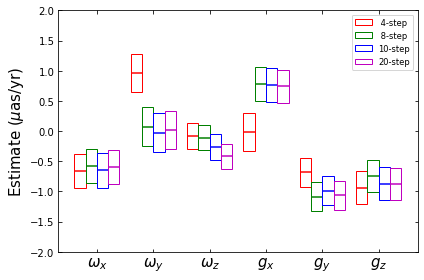

In [13]:
fig, ax = plt.subplots()

for i, cat_name in enumerate(cat_names):
    ax.bar(loc + (i-2)*width, heights[i,:]*2, fill=False,
           bottom=bottoms[i,:], edgecolor=colors[i],
           width=width, align="edge", label=cat_name)

    start = loc + (i-2)*width
    end = start + width
    ax.hlines(estimates[i,:], start, end, color=colors[i])


ax.set_ylim([-2, 2])

ax.legend(fontsize="small")

ax.set_ylabel("Estimate ($\mu$as/yr)", fontsize=15)
ax.set_xticks(loc)
ax.set_xticklabels(names, fontsize=15)

plt.tight_layout()
plt.savefig("../plots/spin-vs-nb-step-def.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


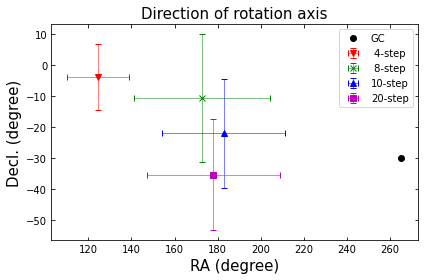

In [14]:
fig, ax = plt.subplots()

ax.errorbar(output2_4["R_ra"], output2_4["R_dec"],
            xerr=output2_4["R_ra_err"],
            yerr=output2_4["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="v", color="r", label=" 4-step")
ax.errorbar(output2_8["R_ra"], output2_8["R_dec"],
            xerr=output2_8["R_ra_err"],
            yerr=output2_8["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="x", color="g", label=" 8-step")
ax.errorbar(output2_10["R_ra"], output2_10["R_dec"],
            xerr=output2_10["R_ra_err"],
            yerr=output2_10["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="^", color="b", label="10-step")
ax.errorbar(output2_20["R_ra"], output2_20["R_dec"],
            xerr=output2_20["R_ra_err"],
            yerr=output2_20["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="s", color="m", label="20-step")


ax.plot(265, -30, "ko", label="GC")

ax.legend()

ax.set_title("Direction of rotation axis", fontsize=15)
ax.set_xlabel("RA (degree)", fontsize=15)
ax.set_ylabel("Decl. (degree)", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/spin-axis-vs-nb-step-def.eps")

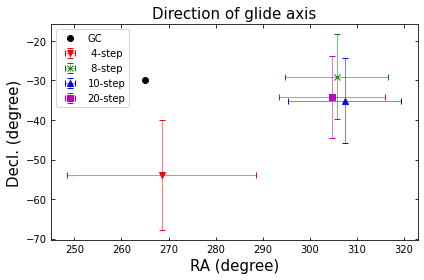

In [15]:
fig, ax = plt.subplots()

ax.errorbar(output2_4["G_ra"], output2_4["G_dec"],
            xerr=output2_4["G_ra_err"],
            yerr=output2_4["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="v", color="r", label=" 4-step")
ax.errorbar(output2_8["G_ra"], output2_8["G_dec"],
            xerr=output2_8["G_ra_err"],
            yerr=output2_8["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="x", color="g", label=" 8-step")
ax.errorbar(output2_10["G_ra"], output2_10["G_dec"],
            xerr=output2_10["G_ra_err"],
            yerr=output2_10["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="^", color="b", label="10-step")
ax.errorbar(output2_20["G_ra"], output2_20["G_dec"],
            xerr=output2_20["G_ra_err"],
            yerr=output2_20["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="s", color="m", label="20-step")


ax.plot(265, -30, "ko", label="GC")

ax.legend()

ax.set_title("Direction of glide axis", fontsize=15)
ax.set_xlabel("RA (degree)", fontsize=15)
ax.set_ylabel("Decl. (degree)", fontsize=15)

plt.tight_layout()
# plt.savefig("../plots/glide-axis-vs-nb-step-def.eps")

# 2 For all source subset

In [16]:
estimates = np.array([r1_all, r2_all, r3_all, g1_all, g2_all, g3_all]).T

heights = np.array(
    [r1_err_all, r2_err_all, r3_err_all, g1_err_all, g2_err_all, g3_err_all]).T

bottoms = estimates - heights

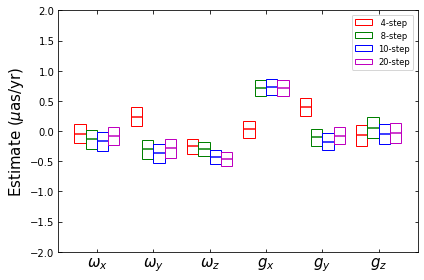

In [17]:
fig, ax = plt.subplots()

for i, cat_name in enumerate(cat_names):
    ax.bar(loc + (i-2)*width, heights[i,:]*2, fill=False,
           bottom=bottoms[i,:], edgecolor=colors[i],
           width=width, align="edge", label=cat_name)

    start = loc + (i-2)*width
    end = start + width
    ax.hlines(estimates[i,:], start, end, color=colors[i])


ax.set_ylim([-2, 2])

ax.legend(fontsize="small")

ax.set_ylabel("Estimate ($\mu$as/yr)", fontsize=15)
ax.set_xticks(loc)
ax.set_xticklabels(names, fontsize=15)

plt.tight_layout()
# plt.savefig("../plots/spin-vs-nb-step-def.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


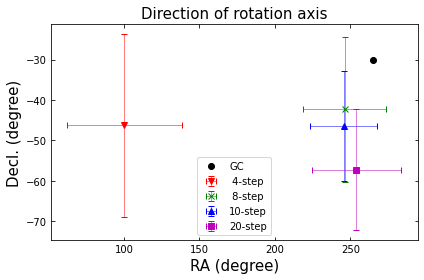

In [18]:
fig, ax = plt.subplots()

ax.errorbar(output1_4["R_ra"], output1_4["R_dec"],
            xerr=output1_4["R_ra_err"],
            yerr=output1_4["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="v", color="r", label=" 4-step")
ax.errorbar(output1_8["R_ra"], output1_8["R_dec"],
            xerr=output1_8["R_ra_err"],
            yerr=output1_8["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="x", color="g", label=" 8-step")
ax.errorbar(output1_10["R_ra"], output1_10["R_dec"],
            xerr=output1_10["R_ra_err"],
            yerr=output1_10["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="^", color="b", label="10-step")
ax.errorbar(output1_20["R_ra"], output1_20["R_dec"],
            xerr=output1_20["R_ra_err"],
            yerr=output1_20["R_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="s", color="m", label="20-step")


ax.plot(265, -30, "ko", label="GC")

ax.legend()

ax.set_title("Direction of rotation axis", fontsize=15)
ax.set_xlabel("RA (degree)", fontsize=15)
ax.set_ylabel("Decl. (degree)", fontsize=15)

plt.tight_layout()
plt.savefig("../plots/spin-axis-vs-nb-step-all.eps")

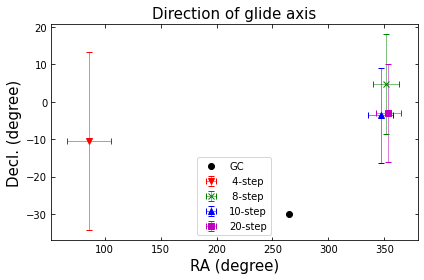

In [19]:
fig, ax = plt.subplots()

ax.errorbar(output1_4["G_ra"], output1_4["G_dec"],
            xerr=output1_4["G_ra_err"],
            yerr=output1_4["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="v", color="r", label=" 4-step")
ax.errorbar(output1_8["G_ra"], output1_8["G_dec"],
            xerr=output1_8["G_ra_err"],
            yerr=output1_8["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="x", color="g", label=" 8-step")
ax.errorbar(output1_10["G_ra"], output1_10["G_dec"],
            xerr=output1_10["G_ra_err"],
            yerr=output1_10["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="^", color="b", label="10-step")
ax.errorbar(output1_20["G_ra"], output1_20["G_dec"],
            xerr=output1_20["G_ra_err"],
            yerr=output1_20["G_dec_err"],
            capsize=3, elinewidth=0.5,
            fmt="s", color="m", label="20-step")


ax.plot(265, -30, "ko", label="GC")

ax.legend()

ax.set_title("Direction of glide axis", fontsize=15)
ax.set_xlabel("RA (degree)", fontsize=15)
ax.set_ylabel("Decl. (degree)", fontsize=15)

plt.tight_layout()
# plt.savefig("../plots/glide-vs-nb-step-all.eps")